In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src/pix2pix/')

In [3]:
import dataloader
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torch
import augmentations
import metrics
import pathlib

In [4]:
img_list = [str(x) for x in pathlib.Path('../generated/lfw/').rglob('*.jpg')]

In [5]:
lfw = dataloader.lfw_dataset(img_paths = img_list)

In [6]:
print (len(lfw))

13233


# loading the datagenerator with no transforms

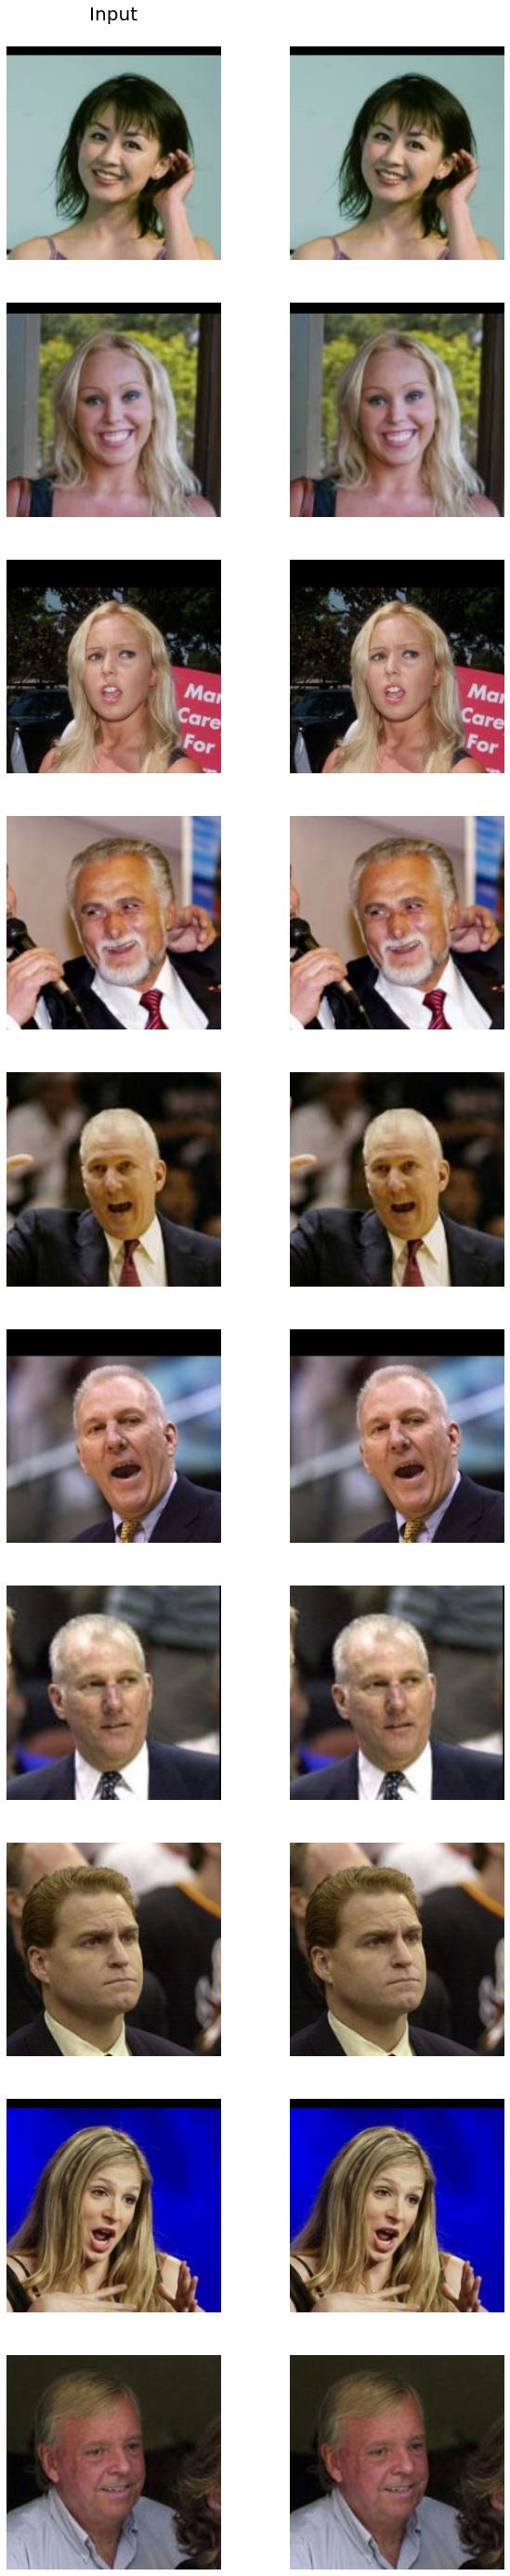

In [12]:
n_rows = 10
n_cols = 2

fig = plt.figure(figsize = (10, 50))


for i in range(0, n_cols * n_rows - 1, 2):
    ip, tgt = lfw[i]
    
    # cast to 0,1 to display
    ip = (ip + 1) / 2 
    tgt = (tgt + 1) / 2 
    
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    ax.imshow(ip.permute(1, 2, 0))
    ax.axis('off')
    
    if i == 0:
        ax.set_title('Input\n', fontsize = 20)   
    
    ax = fig.add_subplot(n_rows, n_cols, i + 2)
    ax.imshow(tgt.permute(1, 2, 0))
    ax.axis('off')
    
    ssim_score = metrics.ssim(ip, tgt)
    psnr_score = metrics.psnr(ip, tgt)
    
#     if i == 0:
#         ax.set_title(f'Target\nssim: {ssim_score:.4f} psnr: {psnr_score:.4f}', fontsize = 20)
#     else:
#         ax.set_title(f'ssim: {ssim_score:.4f} psnr: {psnr_score:.4f}', fontsize = 20)
        

# loading the datagenerator with addition of noise with std_div between 0 and 1

In [50]:
lfw = dataloader.lfw_dataset(img_paths = img_list, transforms = augmentations.augs(gaussian_noise=True))

In [ ]:
torch.random.manual_seed(42)
n_rows = 10
n_cols = 2

fig = plt.figure(figsize = (10, 30))


for i in range(0, n_cols * n_rows - 1, 2):
    ip, tgt = lfw[i]
    
    # cast to 0,1 to display
    ip = (ip + 1) / 2 
    tgt = (tgt + 1) / 2 
    
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    ax.imshow(ip.permute(1, 2, 0))
    ax.axis('off')
    
    if i == 0:
        ax.set_title('Input', fontsize = 20)   
    
    ax = fig.add_subplot(n_rows, n_cols, i + 2)
    ax.imshow(tgt.permute(1, 2, 0))
    ax.axis('off')
    
    ssim_score = metrics.ssim(ip, tgt)
    psnr_score = metrics.psnr(ip, tgt)
    
    if i == 0:
        ax.set_title(f'Target\nssim: {ssim_score:.4f} psnr: {psnr_score:.4f}', fontsize = 20)
    else:
        ax.set_title(f'ssim: {ssim_score:.4f} psnr: {psnr_score:.4f}', fontsize = 20)
